# **전체 데이터를 활용한 모델 성능 비교**

In [2]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from train import *
from ADL_final import *
from cosine_annealing_warmup import CosineAnnealingWarmupRestarts

#from AgeModels3_weight_Gender import *

In [1]:
import importlib
import train
importlib.reload(train)
from train import *

## **0. 데이터 불러오기**

In [3]:
# Train Set

dataset = AudioData(file='csv/train2.pkl', shuffle=True, sample_num=4096, mode=Mode.MULTITASK, train=Train.TRAIN)

 48%|██████████████████▌                    | 1951/4096 [00:52<01:01, 34.69it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13573-02-01-WON.MINJI-F-09-A.pt'


 91%|███████████████████████████████████▍   | 3725/4096 [01:39<00:07, 48.14it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13481-02-01-WON.MINJI-F-09-A.pt'


100%|███████████████████████████████████████| 4096/4096 [01:48<00:00, 37.59it/s]


In [4]:
# Valid Set

dataset_valid = AudioData(file='csv/validation2.pkl', shuffle=True, sample_num=4096, mode=Mode.MULTITASK, train=Train.VAL)

 72%|███████████████████████████▎          | 2950/4096 [00:29<00:10, 105.07it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_07555.pt'


100%|██████████████████████████████████████| 4096/4096 [00:40<00:00, 100.61it/s]


In [53]:
# Data Loader 설정

batch_num = 128 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

In [6]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('/root/runs/AgeRegClassifier3')

In [166]:
age = {'청소년': 0, '청년': 0, '중장년': 0, '노년': 0}
gender = {'여성': 0, '남성': 0}
dialect = {'수도권': 0, '전라도': 0, '경상도': 0, '충청도': 0, '강원도': 0, '제주도': 0}

for dict in dataset_valid:
    if dict['label'][0] == 0:
        age['청소년'] += 1
    elif dict['label'][0] == 1:
        age['청년'] += 1
    elif dict['label'][0] == 2:
        age['중장년'] += 1
    elif dict['label'][0] == 3:
        age['노년'] += 1
            
    if dict['label'][1] == 0:
        gender['여성'] += 1
    elif dict['label'][1] == 1:
        gender['남성'] += 1
        
    if dict['label'][2] == 0:
        dialect['수도권'] += 1
    elif dict['label'][2] == 1:
        dialect['전라도'] += 1
    elif dict['label'][2] == 2:
        dialect['경상도'] += 1
    elif dict['label'][2] == 3:
        dialect['충청도'] += 1
    elif dict['label'][2] == 4:
        dialect['강원도'] += 1
    elif dict['label'][2] == 5:
        dialect['제주도'] += 1

In [167]:
print(age)
print(gender)
print(dialect)

{'청소년': 952, '청년': 3071, '중장년': 4219, '노년': 6020}
{'여성': 8163, '남성': 6099}
{'수도권': 9235, '전라도': 987, '경상도': 2398, '충청도': 962, '강원도': 574, '제주도': 106}


## **1. Multi-Class Multi-Output Model 학습 결과**

### **1-1) Shared-CNN (1차 실험)**

In [163]:
# Hyperparameter 설정

learning_rate = 2e-5
model = Shared_CNN()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Checking accuracy on train set
Age     : Got 305724 / 634112 correct (48.21)
Accuracy of  청소년 : 48 %
Accuracy of   청년 : 27 %
Accuracy of  중장년 : 28 %
Accuracy of   노년 : 51 %
Gender  : Got 534399 / 634112 correct (84.28)
Accuracy of   여성 : 84 %
Accuracy of   남성 : 83 %
Dialect : Got 214003 / 634112 correct (33.75)
Accuracy of  수도권 : 52 %
Accuracy of  전라도 : 26 %
Accuracy of  경상도 :  2 %
Accuracy of  충청도 : 27 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000062초 (per input)


Checking accuracy on validation set


  1%|▍                                       | 1/100 [03:41<6:05:14, 221.36s/it]

Age     : Got 5367 / 14208 correct (37.77)
Accuracy of  청소년 : 23 %
Accuracy of   청년 : 15 %
Accuracy of  중장년 : 16 %
Accuracy of   노년 : 66 %
Gender  : Got 12010 / 14208 correct (84.53)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 75 %
Dialect : Got 5409 / 14208 correct (38.07)
Accuracy of  수도권 : 52 %
Accuracy of  전라도 : 32 %
Accuracy of  경상도 :  3 %
Accuracy of  충청도 : 15 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000051초 (per input)



 99%|███████████████████████████████████████▌| 99/100 [2:12:16<01:19, 79.19s/it]


Checking accuracy on train set
Age     : Got 420829 / 634112 correct (66.37)
Accuracy of  청소년 : 83 %
Accuracy of   청년 : 64 %
Accuracy of  중장년 : 59 %
Accuracy of   노년 : 66 %
Gender  : Got 608255 / 634112 correct (95.92)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 95 %
Dialect : Got 273134 / 634112 correct (43.07)
Accuracy of  수도권 : 55 %
Accuracy of  전라도 : 30 %
Accuracy of  경상도 : 24 %
Accuracy of  충청도 : 45 %
Accuracy of  강원도 :  4 %
Accuracy of  제주도 :  0 %

Duration : 0.00000057초 (per input)


Checking accuracy on validation set


100%|███████████████████████████████████████| 100/100 [2:15:41<00:00, 81.41s/it]

Age     : Got 6268 / 14208 correct (44.12)
Accuracy of  청소년 : 15 %
Accuracy of   청년 : 44 %
Accuracy of  중장년 : 18 %
Accuracy of   노년 : 66 %
Gender  : Got 12378 / 14208 correct (87.12)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 75 %
Dialect : Got 5909 / 14208 correct (41.59)
Accuracy of  수도권 : 56 %
Accuracy of  전라도 : 19 %
Accuracy of  경상도 : 13 %
Accuracy of  충청도 : 19 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000058초 (per input)



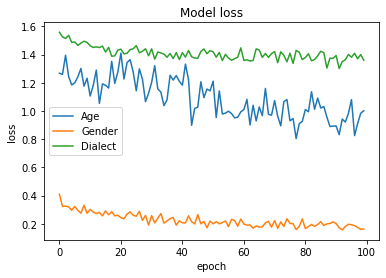

None


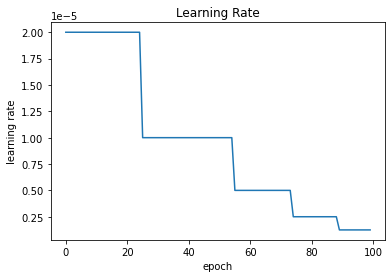

None


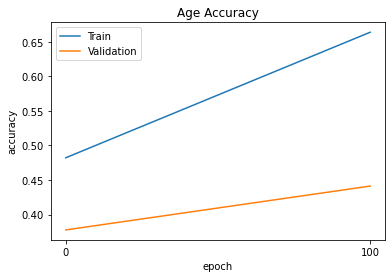

None


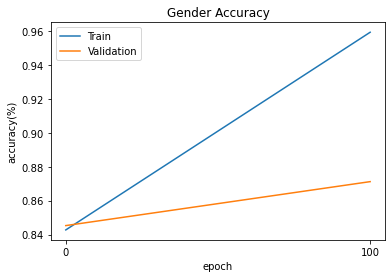

None


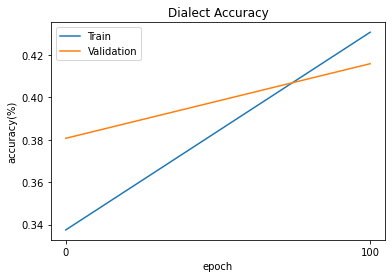

None


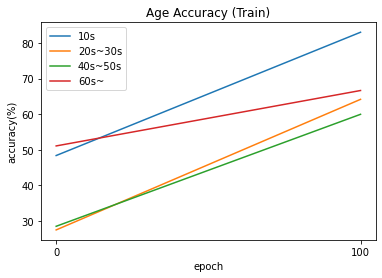

None


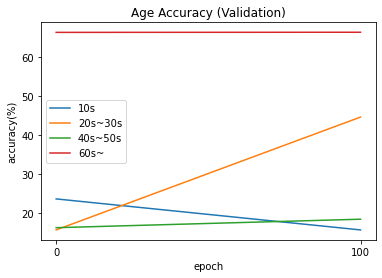

None


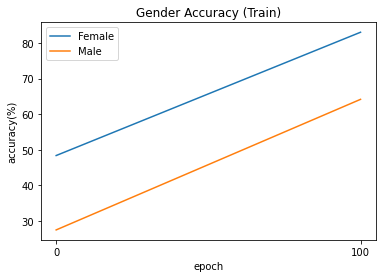

None


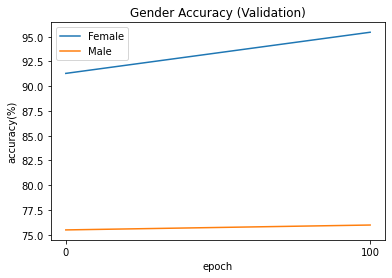

None


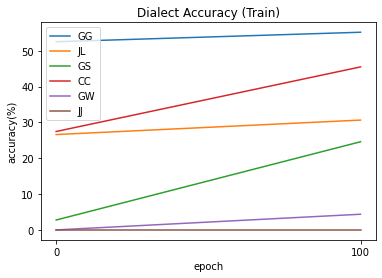

None


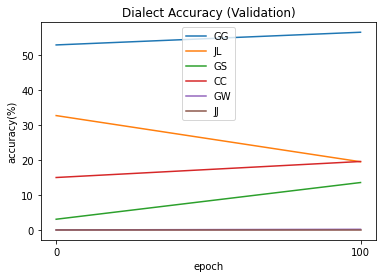

None
Mean Duration for Training per epoch = 78.7540초

---- FINISHED!! ----


In [165]:
# Shared CNN 학습

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, model_name="HPS_CNN_SGD", print_every=100)

Iteration 1 --- Train Loss = 8.0559 --- Age Loss = 2.7688 --- Gender Loss = 1.6958 --- Dialect Loss = 3.5913
Iteration 1001 --- Train Loss = 3.3719 --- Age Loss = 1.1893 --- Gender Loss = 0.6465 --- Dialect Loss = 1.5361
Iteration 2001 --- Train Loss = 3.3859 --- Age Loss = 1.3792 --- Gender Loss = 0.5689 --- Dialect Loss = 1.4378
Iteration 3001 --- Train Loss = 3.2318 --- Age Loss = 1.2608 --- Gender Loss = 0.4871 --- Dialect Loss = 1.4838
Iteration 4001 --- Train Loss = 3.0417 --- Age Loss = 1.2113 --- Gender Loss = 0.3173 --- Dialect Loss = 1.5131
Current Learning Rate :  2e-05
Epoch 1 finished --- Duration : 88.9764초

Checking accuracy on train set
Age     : Got 255374 / 634112 correct (40.27)
Accuracy of  청소년 : 26 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 : 72 %
Accuracy of   노년 : 40 %
Gender  : Got 544802 / 634112 correct (85.92)
Accuracy of   여성 : 86 %
Accuracy of   남성 : 84 %
Dialect : Got 343208 / 634112 correct (54.12)
Accuracy of  수도권 : 99 %
Accuracy of  전라도 :  0 %
Accuracy 

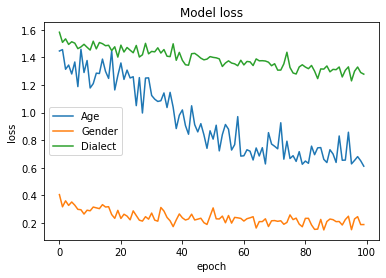

None


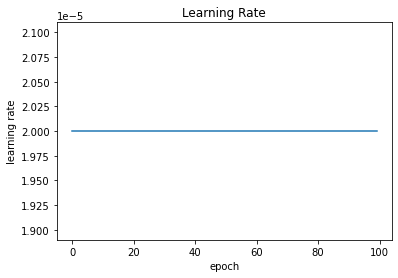

None


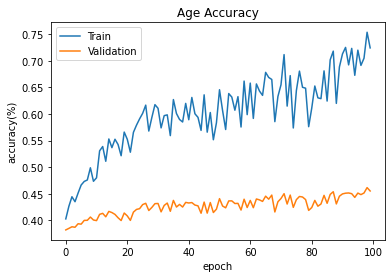

None


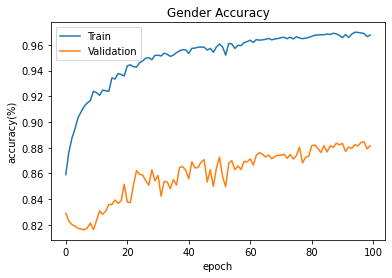

None


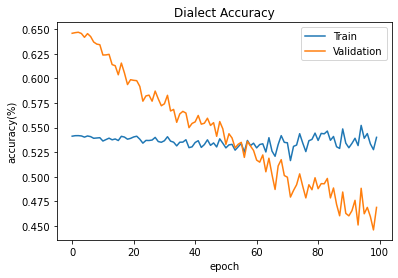

None


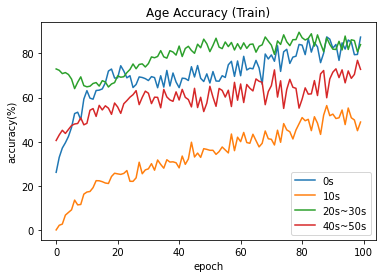

None


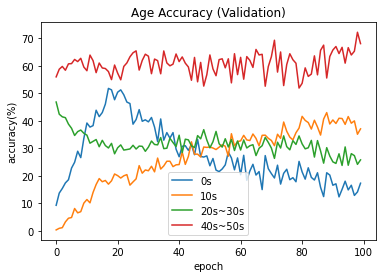

None


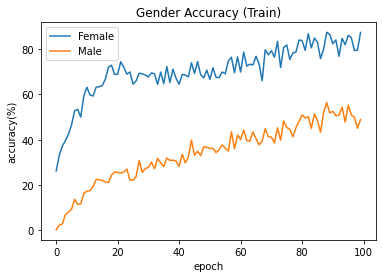

None


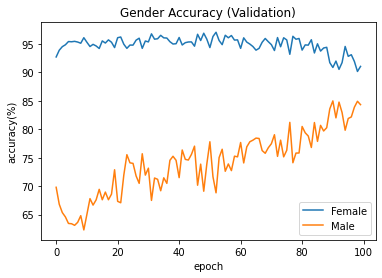

None


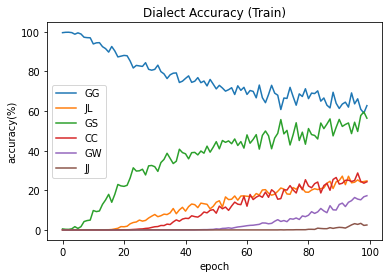

None


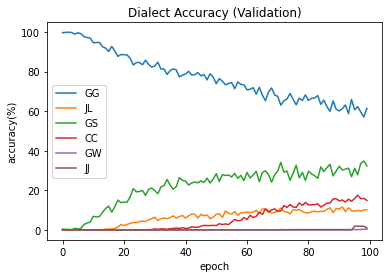

None
Mean Duration for Training per epoch = 92.6076초

---- FINISHED!! ----


In [26]:
# Shared CNN 학습

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, model_name="HPS_CNN_SGD")

### **1-2) Shared-CNN (2차 실험)**

In [27]:
# Hyperparameter 설정

learning_rate = 2e-5
model = Shared_CNN()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

Iteration 1 --- Train Loss = 6.8008 --- Age Loss = 2.0332 --- Gender Loss = 1.5538 --- Dialect Loss = 3.2137
Iteration 1001 --- Train Loss = 3.1310 --- Age Loss = 1.1693 --- Gender Loss = 0.4626 --- Dialect Loss = 1.4992
Iteration 2001 --- Train Loss = 3.2091 --- Age Loss = 1.4314 --- Gender Loss = 0.3300 --- Dialect Loss = 1.4477
Iteration 3001 --- Train Loss = 3.0913 --- Age Loss = 1.2491 --- Gender Loss = 0.3215 --- Dialect Loss = 1.5207
Iteration 4001 --- Train Loss = 2.9498 --- Age Loss = 1.2765 --- Gender Loss = 0.1860 --- Dialect Loss = 1.4872
Current Learning Rate :  2e-05
Epoch 1 finished --- Duration : 105.7517초

Checking accuracy on train set
Age     : Got 308169 / 634112 correct (48.60)
Accuracy of  청소년 : 44 %
Accuracy of   청년 :  4 %
Accuracy of  중장년 : 66 %
Accuracy of   노년 : 50 %
Gender  : Got 585632 / 634112 correct (92.35)
Accuracy of   여성 : 92 %
Accuracy of   남성 : 92 %
Dialect : Got 283385 / 634112 correct (44.69)
Accuracy of  수도권 : 50 %
Accuracy of  전라도 :  0 %
Accuracy

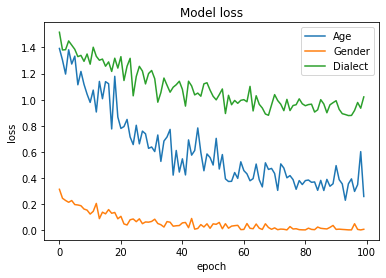

None


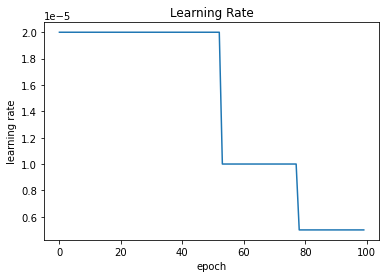

None


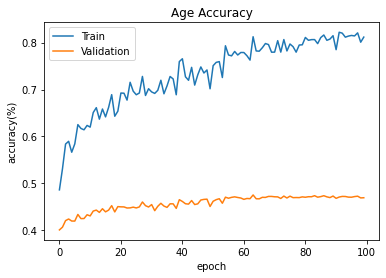

None


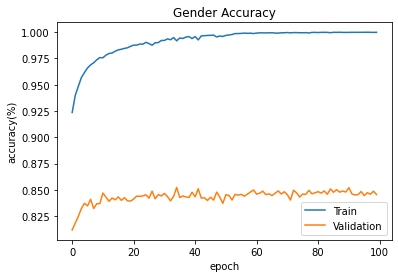

None


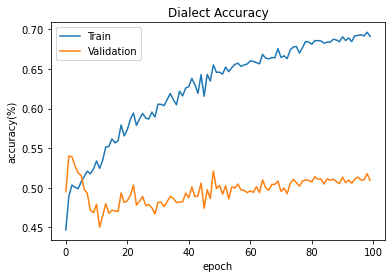

None


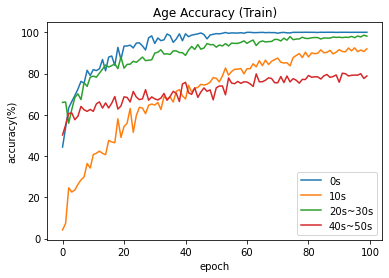

None


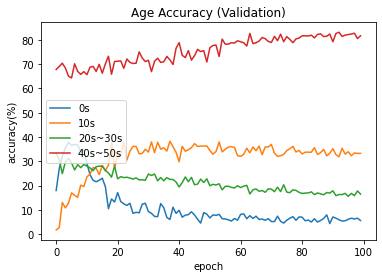

None


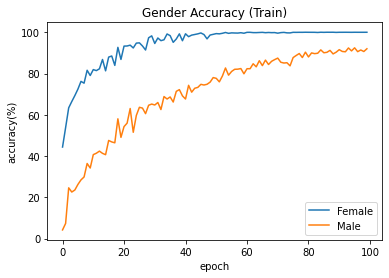

None


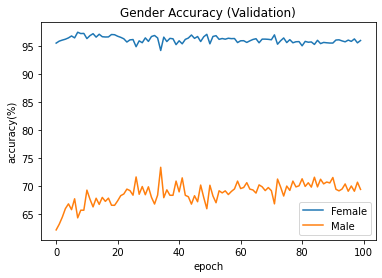

None


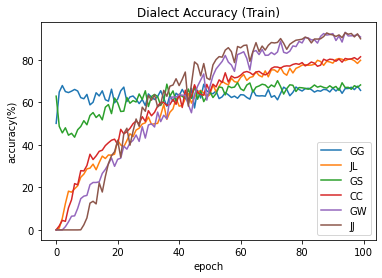

None


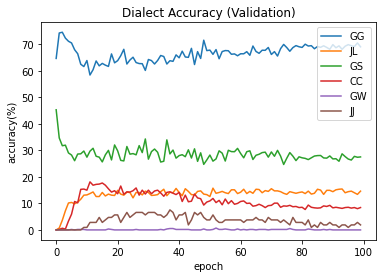

None
Mean Duration for Training per epoch = 104.4951초

---- FINISHED!! ----


In [28]:
# Shared CNN 학습

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num)

### **2-1) CLSTM (1차 실험)**

In [54]:
# Hyperparameter 설정

learning_rate = 0.001
model = CLSTM_Fin()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

  0%|                                                     | 0/1 [00:00<?, ?it/s]


Checking accuracy on train set
Age     : Got 377329 / 634112 correct (59.51)
Accuracy of  청소년 : 46 %
Accuracy of   청년 : 55 %
Accuracy of  중장년 : 27 %
Accuracy of   노년 : 62 %
Gender  : Got 607680 / 634112 correct (95.83)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 94 %
Dialect : Got 264123 / 634112 correct (41.65)
Accuracy of  수도권 : 58 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 : 30 %
Accuracy of  충청도 : 18 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000039초 (per input)


Checking accuracy on validation set


100%|████████████████████████████████████████████| 1/1 [09:56<00:00, 596.37s/it]

Age     : Got 5997 / 14208 correct (42.21)
Accuracy of  청소년 : 31 %
Accuracy of   청년 : 39 %
Accuracy of  중장년 : 12 %
Accuracy of   노년 : 65 %
Gender  : Got 12453 / 14208 correct (87.65)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 78 %
Dialect : Got 6280 / 14208 correct (44.20)
Accuracy of  수도권 : 59 %
Accuracy of  전라도 :  1 %
Accuracy of  경상도 : 27 %
Accuracy of  충청도 : 13 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000039초 (per input)



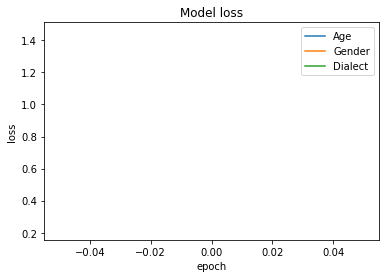

None


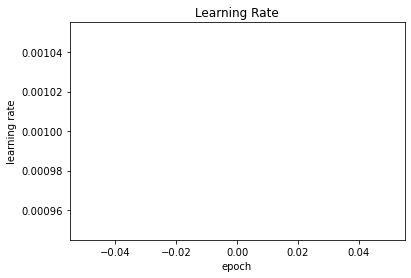

None


ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of ticklabels (2).

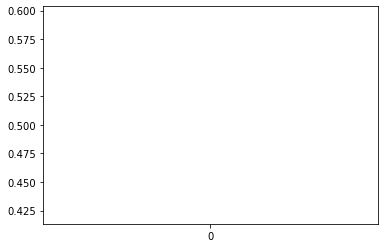

In [55]:
# CLSTM

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=1, batch_size=batch_num, print_every=1, model_name='CLSTM_Adam_Fin2')

### **2-2) CLSTM (2차 실험)**

In [ ]:
# Data Loader 설정

batch_num = 4096 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

# Hyperparameter 설정

learning_rate = 0.01
model = CLSTM_Fin()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = CosineAnnealingWarmupRestarts(optimizer, first_cycle_steps=20, cycle_mult=1.0, max_lr=0.05, min_lr=0.00001, warmup_steps=2, gamma=0.8)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

# CLSTM

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, print_every=100, model_name='CLSTM_SGD_Fin')

In [ ]:
# CLSTM

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, print_every=100, model_name='CLSTM_SGD_Fin')

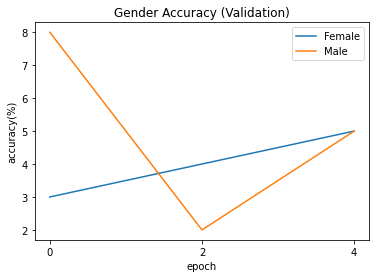

In [148]:
import matplotlib.pyplot as plt
gender_class_val_ac = {'여성': [3, 4, 5], '남성': [8, 2, 5]}
df_gender_val = pd.DataFrame(gender_class_val_ac)
df_gender_val.plot(xlabel="epoch", ylabel="accuracy(%)")
plt.xticks(list(range(df_gender_val.shape[0])), labels=list(range(0, 5, 2)))
plt.legend(['Female', 'Male'])
plt.title("Gender Accuracy (Validation)")
plt.show()

In [141]:
list(range(df_gender_val.shape[0]))

[0, 1, 2]

## **성별 베이스라인**

Iteration 1 --- Train Loss = 0.7180
Iteration 501 --- Train Loss = 0.6898
Epoch 1 finished --- Duration : 87.2619초
Checking accuracy on train set
Gender  : Got 383119 / 633856 correct (60.44)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 11 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 7381 / 13312 correct (55.45)
Accuracy of   여성 : 76 %
Accuracy of   남성 : 16 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6903
Iteration 501 --- Train Loss = 0.6938
Epoch 2 finished --- Duration : 86.4918초
Checking accuracy on train set
Gender  : Got 392422 / 633856 correct (61.91)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 7589 / 13312 correct (57.01)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6940
Iteration 501 --- Train Loss = 0.6939
Epoch 3 finished --- Duration : 86.7145초
Checking 

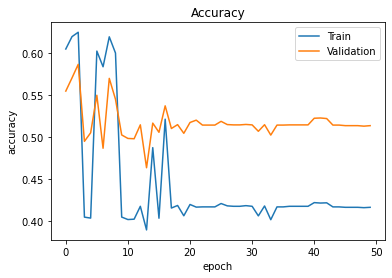

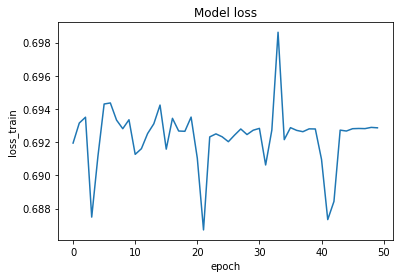

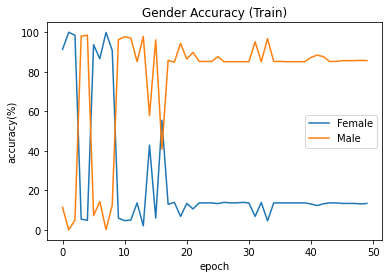

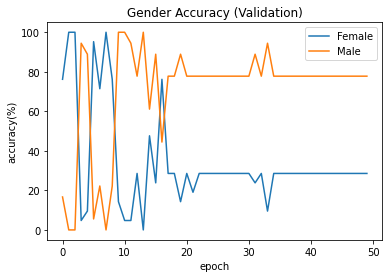

Mean Duration for Training per epoch = 85.2512초

---- FINISHED!! ----


In [42]:
learning_rate = 1e-2

model = RNN_G(batch_size=batch_num)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_G(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num)

## **방언**

In [237]:
learning_rate = 1e-2

model = CNN_D()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_D(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [5]:
# Data Loader 설정

batch_num = 1024 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

learning_rate = 1e-2

model = RNN_D(batch_size=batch_num)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_D(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=2, batch_size=batch_num, print_every=2)

NameError: name 'writer' is not defined

 98%|██████████████████████████████████████████▏| 49/50 [00:42<00:00,  1.09it/s]

Checking accuracy on train set
[1414.0, 230.0, 689.0, 194.0, 21.0, 12.0]
Dialect : Got 1414 / 2560 correct (55.23)
Accuracy of  수도권 : 100 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000029초 (per input)

Checking accuracy on validation set


100%|███████████████████████████████████████████| 50/50 [00:44<00:00,  1.12it/s]

[1818.0, 178.0, 484.0, 195.0, 120.0, 21.0]
Dialect : Got 1818 / 2816 correct (64.56)
Accuracy of  수도권 : 100 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000031초 (per input)



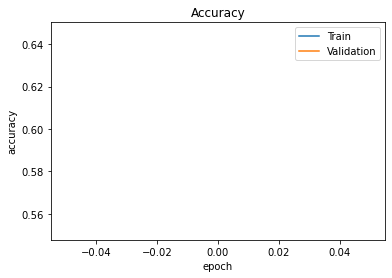

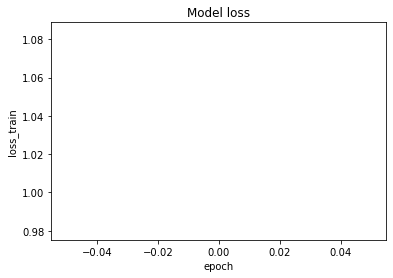

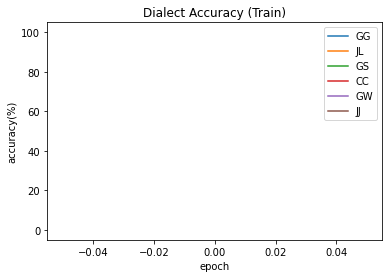

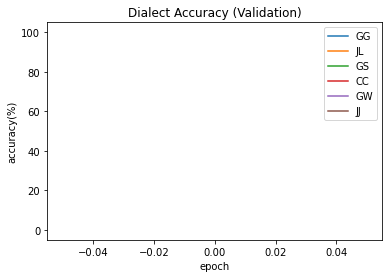

Mean Duration for Training per epoch = 0.8653초

---- FINISHED!! ----


In [9]:
learning_rate = 1e-3

model = CnnLSTM_Dialect(batch_size=batch_num)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_D(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

## **연령**

In [11]:
for dict in dataloader:
    print(dict)

{'input': tensor([[[[-5.7706e+02, -5.7706e+02, -5.7706e+02,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          ...,
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]],

         [[-9.6177e+01, -8.6559e+01, -6.7324e+01,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
          

In [12]:
for dict in dataset:
    print(dict)

{'input': tensor([[[-577.0598, -577.0598, -577.0598,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         ...,
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000]],

        [[ -96.1766,  -86.5590,  -67.3236,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         ...,
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'input': tensor([[[-658.2107, -658.2107, -658.2107,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         ...,
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000]],

        [[-109.7018,  -98.7316,  -76.7912,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         ...,
         [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
             0.0000],
         [   0.0000,    0.0000

 98%|██████████████████████████████████████████▏| 49/50 [00:08<00:00,  5.69it/s]

Checking accuracy on train set
[54.0, 146.0, 157.0, 2203.0]
age : Got 94 / 2560 correct (3.67)
Accuracy of  청소년 : 62 %
Accuracy of   청년 : 41 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %

Duration : 0.00000025초 (per input)

Checking accuracy on validation set


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.24it/s]

[178.0, 619.0, 824.0, 1195.0]
age : Got 316 / 2816 correct (11.22)
Accuracy of  청소년 : 88 %
Accuracy of   청년 : 25 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %

Duration : 0.00000024초 (per input)



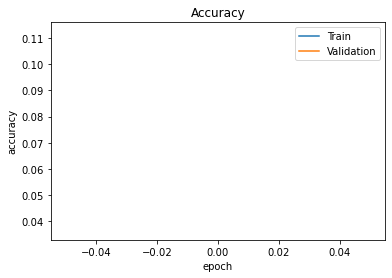

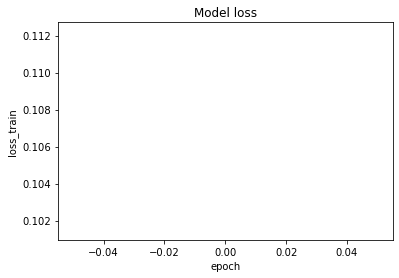

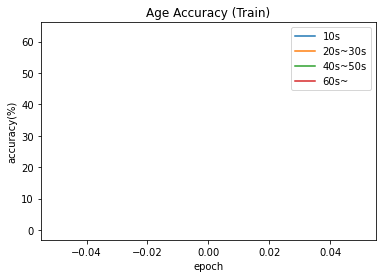

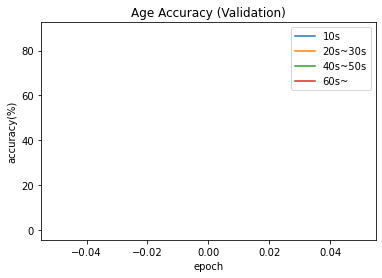

Mean Duration for Training per epoch = 0.1787초

---- FINISHED!! ----


In [8]:
# Data Loader 설정

batch_num = 128 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

learning_rate = 1e-2

model = CNN_A()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_A(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

 98%|██████████████████████████████████████████▏| 49/50 [00:10<00:00,  4.58it/s]

Checking accuracy on train set
[42.0, 106.0, 119.0, 1781.0]
age : Got 42 / 2048 correct (2.05)
Accuracy of  청소년 : 100 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %

Duration : 0.00000006초 (per input)

Checking accuracy on validation set


100%|███████████████████████████████████████████| 50/50 [00:11<00:00,  4.40it/s]

[130.0, 443.0, 593.0, 882.0]
age : Got 130 / 2048 correct (6.35)
Accuracy of  청소년 : 100 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %

Duration : 0.00000004초 (per input)



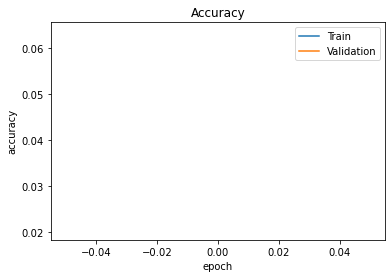

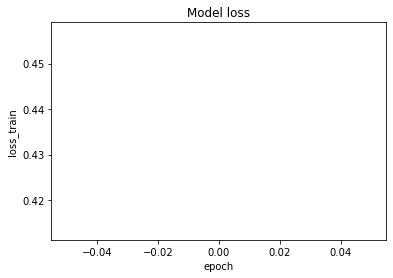

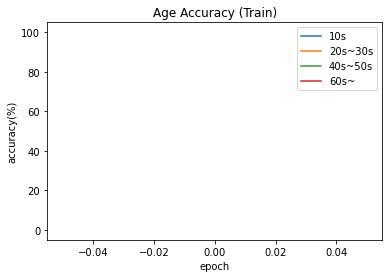

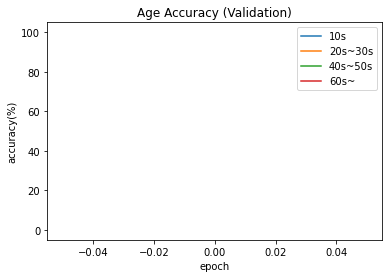

Mean Duration for Training per epoch = 0.2151초

---- FINISHED!! ----


In [13]:
# Data Loader 설정

batch_num = 1024 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

learning_rate = 1e-3

model = RNN_A(batch_size=batch_num)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_A(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

 98%|██████████████████████████████████████████▏| 49/50 [00:15<00:00,  3.24it/s]

Checking accuracy on train set
[42.0, 106.0, 119.0, 1781.0]
age : Got 42 / 2048 correct (2.05)
Accuracy of  청소년 : 100 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %

Duration : 0.00000004초 (per input)

Checking accuracy on validation set


100%|███████████████████████████████████████████| 50/50 [00:15<00:00,  3.14it/s]

[130.0, 443.0, 593.0, 882.0]
age : Got 130 / 2048 correct (6.35)
Accuracy of  청소년 : 100 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %

Duration : 0.00000006초 (per input)



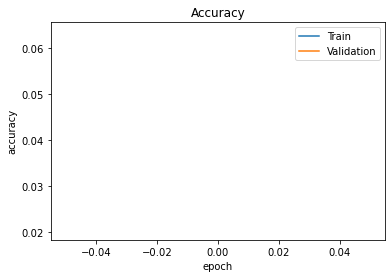

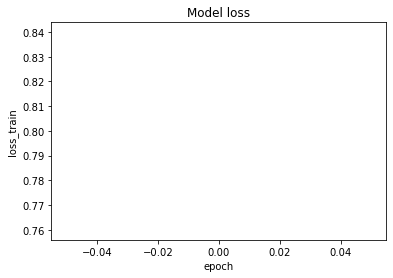

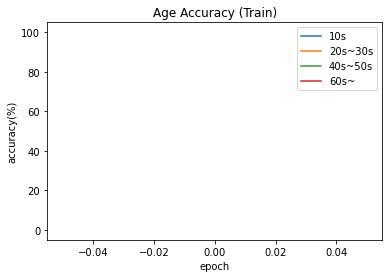

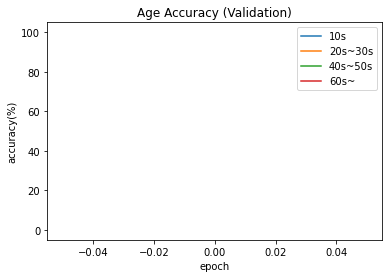

Mean Duration for Training per epoch = 0.3052초

---- FINISHED!! ----


In [14]:
# Data Loader 설정

batch_num = 1024 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

learning_rate = 1e-3

model = CnnLSTM_Age(batch_size=batch_num)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_A(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)